## Исследование данных о российском кинопрокате



Заказчик исследования - Министерство культуры РФ. Необходимо исследовать основные тренды российского кинопроката.

Исходные данные с портала Министерства культуры и сайта Кинопоиск.

Для проведения исследования необходимо:
    
    - изучить общую информацию о датафрейме;
    - обработать пропущенные или аномальные значения;
    - проверить дубликаты;
    - добавить новые столбцы с недостающими значениями;
    - изучить информацию о прокате;
    - изучить информацию о фильмах с государственной поддержкой.
    
У нас представлены данные из двух датафреймов. В первом сожержатся названия фильмов, прокатное удостоверение, дата примьеры, жанр, тип картины, студия, режиссер, продюссер, возрастное ограничение, рейтинг, сведения о бюджете и поддержки от государства.

В втором содерджатся данные о прокатном удостоверении и кассовых сборах в кинотеатрах.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [74]:
data_movie = pd.read_csv('/datasets/mkrf_movies.csv')
data_shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [3]:
data_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
data_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Объединять два датафрейма в один будем по номерам прокатного удостоверения (столбцу `puNumber`)

In [5]:
#в датафрейме data_movie тип данных указан object, есть строка со значением "нет".
#оставим только те строки, в которых есть номер прокатного удостоверения и преобразуем в тип int
data_movie['puNumber'].sort_values().unique()

array([' 111004112', '111000110', '111000111', ..., '231001012',
       '231001111', 'нет'], dtype=object)

In [6]:
data_movie = data_movie[data_movie['puNumber']!='нет']
data_movie['puNumber'] = data_movie['puNumber'].astype(int)

In [7]:
#объединяем в единый датафрейм
#в него вошли все строки из таблицы data_movie
data = data_shows.merge(data_movie, on = 'puNumber', how='right')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   puNumber               7485 non-null   int64  
 1   box_office             3158 non-null   float64
 2   title                  7485 non-null   object 
 3   show_start_date        7485 non-null   object 
 4   type                   7485 non-null   object 
 5   film_studio            7467 non-null   object 
 6   production_country     7483 non-null   object 
 7   director               7476 non-null   object 
 8   producer               6917 non-null   object 
 9   age_restriction        7485 non-null   object 
 10  refundable_support     332 non-null    float64
 11  nonrefundable_support  332 non-null    float64
 12  budget                 332 non-null    float64
 13  financing_source       332 non-null    object 
 14  ratings                6519 non-null   object 
 15  genr

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [9]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format= '%Y-%m-%dT%H:%M:%S')
data['genres'] = data['genres'].astype(str)
data['director'] = data['director'].astype(str)
data['ratings'] = data['ratings'].str.replace('%', '').astype(float)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   puNumber               7485 non-null   int64              
 1   box_office             3158 non-null   float64            
 2   title                  7485 non-null   object             
 3   show_start_date        7485 non-null   datetime64[ns, UTC]
 4   type                   7485 non-null   object             
 5   film_studio            7467 non-null   object             
 6   production_country     7483 non-null   object             
 7   director               7485 non-null   object             
 8   producer               6917 non-null   object             
 9   age_restriction        7485 non-null   object             
 10  refundable_support     332 non-null    float64            
 11  nonrefundable_support  332 non-null    float64          

**Вывод**

Необходимо было заменить данные в столбцах `show_start_date` (datetime) и `ratings` (float) для более удобной обработки в дальнейшем. В остальном формат данных в порядке.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

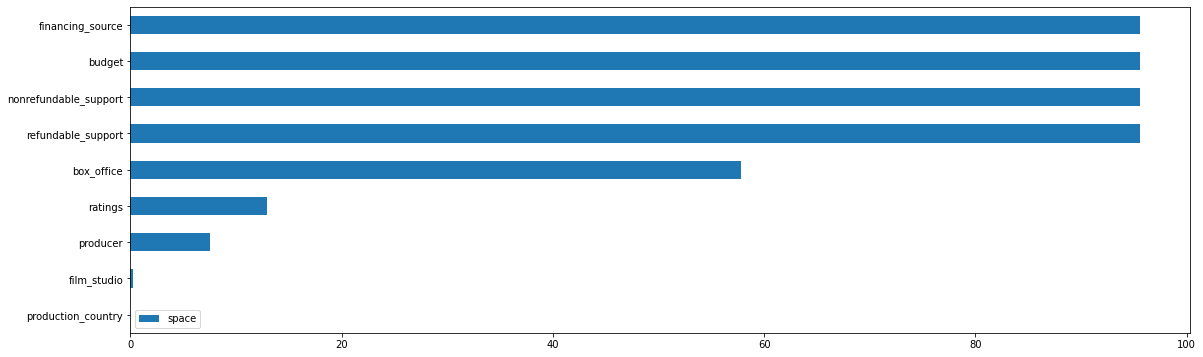

In [11]:
def nan_barh(data):
        (
            (data.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6))   
        );
        
nan_barh(data)

Больше всего пропущенных значение в столбцах, напрямую связанных с государственной поддержкой. Здесь пропуски объясняются тем, что государственной поддержки просто нет. Пропуски в этих столбцах заполним `0`

Причина появления пропусков в столбцах `box_office`, `ratings`, `producer` и `film_studio` не понятна. Оставим их как есть.

In [12]:
data['refundable_support'] = data['refundable_support'].fillna(0)
data['nonrefundable_support'] = data['nonrefundable_support'].fillna(0)
data['budget'] = data['budget'].fillna(0)

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [13]:
#проверка на явные дубликаты
data.duplicated().sum()

0

In [14]:
#проверка повторяющихся фильмов
data.duplicated(['title', 'film_studio', 'director']).sum()

665

In [15]:
#проверила дубликаты по прокатным удостоверениям и тайтлам, повторяющихся нет, получается вывод все же верный
#(пускали в прокат несколько раз)
data.duplicated(['title', 'puNumber']).sum()

0

In [16]:
data.duplicated(['title']).sum()

714

In [17]:
data.duplicated(['puNumber']).sum()

2

In [18]:
data[data['puNumber'].duplicated()]

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
4638,221154310,NaN,Иоанна - женщина на папском престоле /По роман...,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,7.6,"драма,мелодрама,история"
5067,221054410,NaN,Анализируй то!,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.0,0.0,0.0,NaN,6.8,"комедия,криминал"


У нас нет явных дубликатов, однако есть повторяющиеся фильмы. Скорее всего их несколько раз пускали в прокат, поэтому данные повторяются.

Есть дубликаты по прокатным удостоверениям, однако номера там разные(?) и фильмы не совпадают. Возможно ошибка.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [19]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [20]:
data['type'] = data['type'].str.strip()
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [21]:
data['production_country'].sort_values().unique()
data['production_country'].nunique()

950

In [22]:
data['production_country'] = data['production_country'].str.strip()
data['production_country'] = data['production_country'].str.replace('К;анада', 'Канада')
data['production_country'] = data['production_country'].str.replace('-', ',')

In [23]:
data['film_studio'].nunique()

5490

In [24]:
data['film_studio'] = data['film_studio'].str.lower()
data['film_studio'].nunique()

5450

In [25]:
data['director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

**Вывод**

Общая проблема всех категориальных значений - разная запись.

В столбце со странами встречаются разные разделители или разный порядок записи, почти везде указано в среднем 2-4 страны, участвующие в создании фильма, в столбце со студией разное написание названия или регистра записи (сократили 40 неявных дубликатов благодаря смене регистра), в столбце с режиссером встречается полное написание имени и фамилии, сокращенное, несколько режиссеров.

Также в одном из столбцов указан год, что может быть ошибкой, появившейся из-за человеческого фактора.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [26]:
data['ratings'].unique()

array([ 7.2,  6.6,  6.8,  7.7,  8.3,  8. ,  7.8,  8.1,  7.1,  6. ,  7.4,
        5.8,  8.7,  6.3,  6.9,  5. ,  4.3,  7.3,  7. ,  6.4,  nan,  8.2,
        7.5,  6.7,  7.9,  5.9,  6.2,  5.6,  6.5,  2.4,  7.6,  6.1,  8.6,
        8.5,  8.8,  5.5,  5.1,  5.7,  5.4, 99. ,  4.4,  4.5,  5.3,  4.1,
        8.4,  2.6,  3.8,  4.6,  4.8,  4. ,  3. ,  1.6,  4.2,  5.2,  4.7,
        4.9,  3.9,  2.7,  3.3,  2.9, 28. ,  3.7,  1.4,  3.1, 97. ,  3.5,
        3.2,  2.8,  1.5,  2.1,  2.5,  9.2,  3.4,  1.1,  3.6, 83. , 64. ,
       91. , 94. , 62. , 79. , 90. , 19. , 88. ,  1. , 89. ,  1.3,  1.9,
        1.8,  1.2,  1.7,  9. , 98. ,  8.9,  9.1])

В столбце с рейтингом мы видим отсутствие единой шкалы для его расчета, часть значений идут по 10-ти балльной шкале, часть по 100 бальной.

In [27]:
data[data['ratings']>10].count()

puNumber                 29
box_office               15
title                    29
show_start_date          29
type                     29
film_studio              29
production_country       29
director                 29
producer                 29
age_restriction          29
refundable_support       29
nonrefundable_support    29
budget                   29
financing_source          2
ratings                  29
genres                   29
dtype: int64

Значений с отличной записью (в процентах) не так много, такие значения дропнем.

In [28]:
#оставим значение, которые рассчитываются по 10-ти балльной шкале и строки с пропусками
data = data.query('ratings.isna() | ratings<10')

In [29]:
data[['box_office', 'refundable_support', 'nonrefundable_support',
      'budget']].apply(['count', 'min', 'max', 'mean', 'median']).style.format('{:,.2f}')

,box_office,refundable_support,nonrefundable_support,budget
count,"3,143.00","7,456.00","7,456.00","7,456.00"
min,0.00,0.00,0.00,0.00
max,"3,073,568,690.79","180,000,000.00","400,000,000.00","2,305,074,303.00"
mean,"76,671,582.27","528,299.36","2,179,048.86","5,657,967.20"
median,"2,351,960.00",0.00,0.00,0.00


In [30]:
data[['box_office', 'refundable_support', 'nonrefundable_support',
      'budget']].quantile([0.0012, 0.01, .5, .99, .9988]).style.format('{:,.2f}')

,box_office,refundable_support,nonrefundable_support,budget
0.0012,0.00,0.00,0.00,0.00
0.01,100.00,0.00,0.00,0.00
0.5,"2,351,960.00",0.00,0.00,0.00
0.99,"1,284,025,459.81","19,000,000.00","50,000,000.00","155,606,634.70"
0.9988,"2,153,607,089.52","100,000,000.00","250,000,000.00","530,350,484.96"


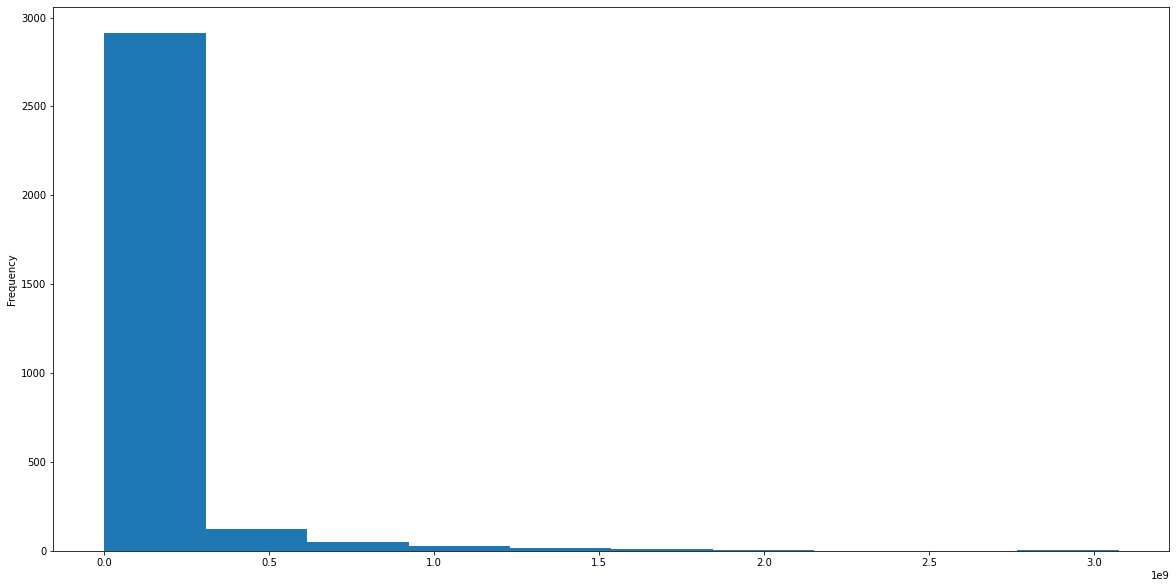

In [31]:
data['box_office'].plot(kind='hist', figsize=(20,10));

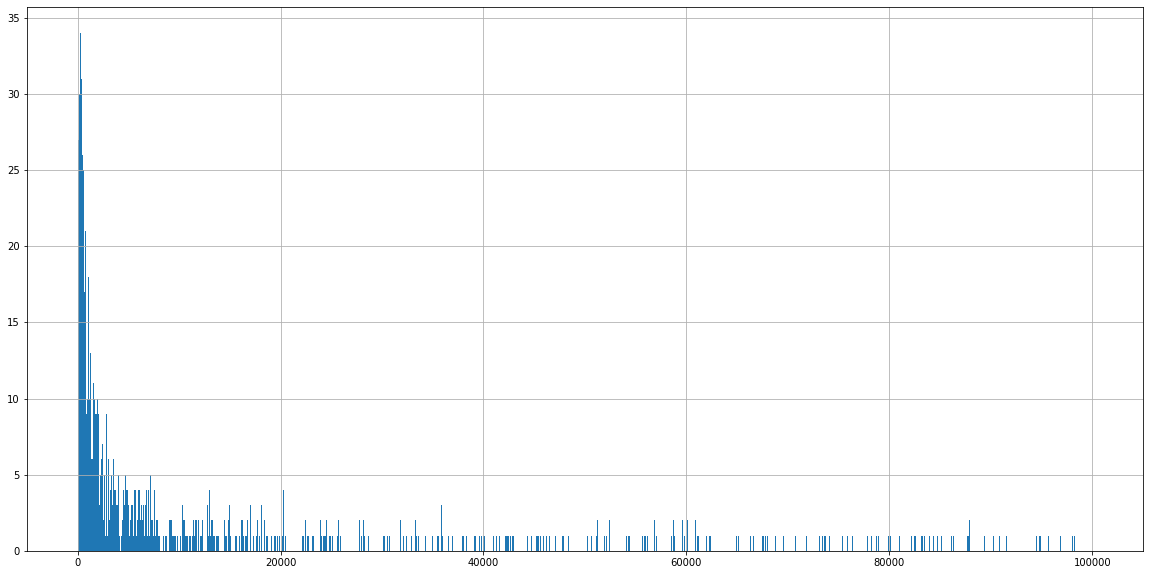

In [32]:
data['box_office'].hist(bins=1000, range=(0, 100000), figsize=(20, 10));

У нас есть строки с достаточно низкими сборами (даже меньше 100000), есть с достаточно высокими (более 2000000000).
Оставим только строки со значением сборов больше 10000.

In [33]:
data = data.query('box_office.isna() | box_office>10000')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6920 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   puNumber               6920 non-null   int64              
 1   box_office             2607 non-null   float64            
 2   title                  6920 non-null   object             
 3   show_start_date        6920 non-null   datetime64[ns, UTC]
 4   type                   6920 non-null   object             
 5   film_studio            6902 non-null   object             
 6   production_country     6918 non-null   object             
 7   director               6920 non-null   object             
 8   producer               6425 non-null   object             
 9   age_restriction        6920 non-null   object             
 10  refundable_support     6920 non-null   float64            
 11  nonrefundable_support  6920 non-null   float64          

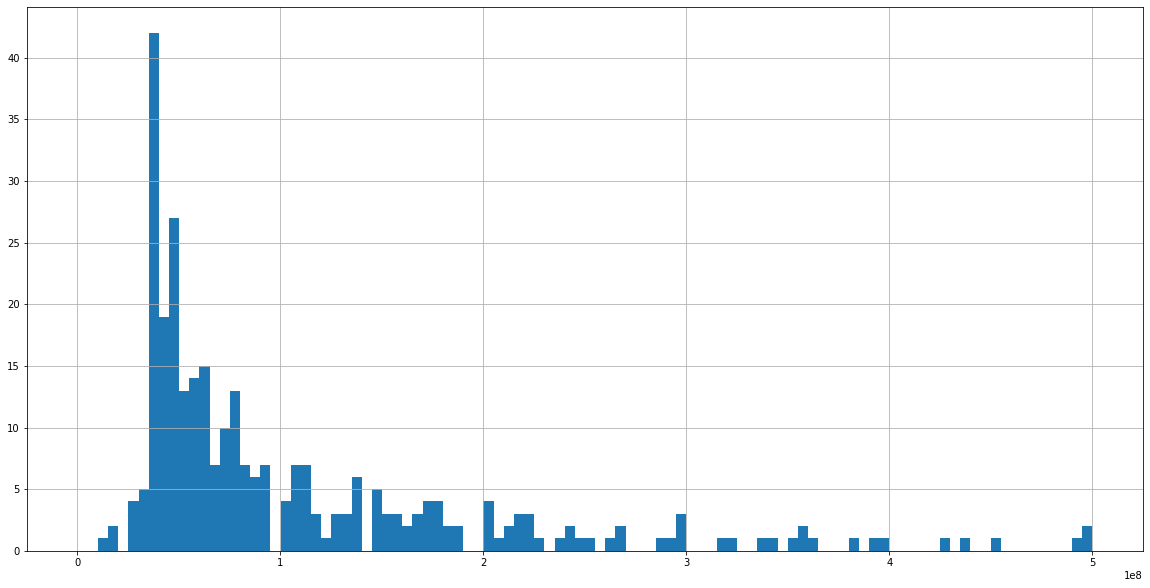

In [34]:
data['budget'].hist(bins=100, range=(100000, 500000000), figsize=(20, 10));

Значения выше 500000000 рублей бюджета выглядят редкими, но не аномальными(бюджет фильма Сталинград составляет почти 2000000000 рублей 30000000 долларов).

Столбцы связанные с поддержкой государства напрямую свяязаны с бюджетов (значения указаны только если оба условия правдивы), поэтому значения в них трогать не будем.

**Вывод**

Важный вопрос, в какой единице измерения указаны сборы? Потому что если это значения в рублях, то они выглядят достаточно реалистично, если же нет, то они аномально большие. Поскольку в столбце с бюджетом указаны значения в рублях, предположим, что и все остальные в рублях.

Однако, у нас есть аномально низкие значения в столбце со сборами, их будет лучше удалить.
Есть очень высокие и редкие значения, но путем быстрого серфинга интернета можно заметить, что миллиардные бюджеты не так уж и редки (обычно, бюджет фильма указывается в долларах, при переводе в рубли цифры просто огромны). Очень большие значения трогать не будем.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [35]:
data['year_exposition'] = data['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [36]:
data['director'] = data['director'].str.split(', ')
data['genres'] = data['genres'].str.split(',')

In [37]:
#жанр
def genre(row):
    main_genre = row['genres']
    return main_genre[0]
    
data['main_genre'] = data.apply(genre, axis=1)

In [38]:
#режиссер
def director(row):
    main_director = row['director']
    return main_director[0]

data['main_director'] = data.apply(director, axis=1)

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [39]:
data['support_percent'] = (data['refundable_support']+data['nonrefundable_support'])/data['budget']

In [68]:
data.query('support_percent>0')

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,year_exposition,main_genre,main_director,support_percent
1281,111005313,3.653536e+05,Пока еще жива,2013-10-11 12:00:00+00:00,Художественный,"ано содействия развитию кинематографии ""ангел-...",Россия,[А.Атанесян],"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"[драма, мелодрама]",2013,драма,А.Атанесян,0.333703
1448,111003314,2.814000e+04,Бесславные придурки,2014-03-28 12:00:00+00:00,Художественный,"ооо ""компания ""атк-студио""",Россия,[А.Якимчук],А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,[nan],2014,nan,А.Якимчук,0.700000
1498,111004213,1.995703e+07,Невидимки,2013-09-10 12:00:00+00:00,Художественный,"ооо ""компания ""реал-дакота""",Россия,"[Р.Давлетьяров, С.Комаров]","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"[комедия, фантастика]",2013,комедия,Р.Давлетьяров,0.612691
1524,111004314,5.591750e+04,БЕРЦЫ,2014-05-05 12:00:00+00:00,Художественный,"ооо ""студия ""пассажир""",Россия,[Е.Миндадзе (псевдоним Катя Шагалова)],Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,[драма],2014,драма,Е.Миндадзе (псевдоним Катя Шагалова),0.690095
1792,111004414,2.321000e+05,Братья Ч,2014-04-23 12:00:00+00:00,Художественный,"ооо ""студия ""пассажир""",Россия,[М.Угаров],"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,[драма],2014,драма,М.Угаров,0.624764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,111022019,7.177032e+08,Союз спасения,2019-12-26 12:00:00+00:00,Художественный,"зао ""дирекция кино""",Россия,[А.Кравчук],"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"[история, биография, драма]",2019,история,А.Кравчук,0.510204
7465,114005019,5.010692e+08,Иван Царевич и Серый Волк 4,2019-12-20 12:00:00+00:00,Анимационный,"ооо ""студия анимационного кино ""мельница""",Россия,"[Д.Шмидт, К.Феоктистов]","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,0.0,190000000.0,Фонд кино,6.7,"[мультфильм, приключения, семейный]",2019,мультфильм,Д.Шмидт,0.526316
7473,111022519,NaN,Вторжение,2019-12-23 12:00:00+00:00,Художественный,"ооо ""арт пикчерс студия"", ооо ""водород 2011""",Россия,[ Ф.Бондарчук],"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"[фантастика, боевик]",2019,фантастика,Ф.Бондарчук,0.529661
7475,111023019,NaN,Я свободен,2019-12-26 12:00:00+00:00,Художественный,"ао ""тпо ""киностудия им. м.горького""",Россия,[И.Северов],С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,Министерство культуры,5.9,[драма],2019,драма,И.Северов,0.649998


In [72]:
data['support_percent'].sort_values(ascending=False).unique()

array([       inf, 0.78474525, 0.70000001, 0.7       , 0.7       ,
       0.69999999, 0.69999999, 0.69999998, 0.69998218, 0.69996216,
       0.69976421, 0.69910397, 0.69836488, 0.69767442, 0.69714819,
       0.69591643, 0.695     , 0.69459069, 0.69444444, 0.69413076,
       0.69286755, 0.69009473, 0.69      , 0.68992812, 0.68947448,
       0.68717703, 0.68396547, 0.68297529, 0.67999951, 0.67994543,
       0.67774533, 0.67662156, 0.67516879, 0.67146749, 0.67122405,
       0.66896323, 0.66736217, 0.66666667, 0.66666547, 0.66656877,
       0.66634009, 0.66622252, 0.66601175, 0.66599993, 0.66592675,
       0.66509779, 0.665     , 0.66489362, 0.66424729, 0.66392217,
       0.66292033, 0.66268254, 0.6625    , 0.66235202, 0.66197715,
       0.66122309, 0.66051763, 0.66000002, 0.65878099, 0.65810325,
       0.65789474, 0.65770191, 0.65702441, 0.65683794, 0.65636079,
       0.65625   , 0.65498608, 0.65448889, 0.65331017, 0.65000001,
       0.65      , 0.65      , 0.64999944, 0.64999942, 0.64999

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [42]:
data_year_movies = data.pivot_table(index='year_exposition', values=('puNumber', 'box_office'), aggfunc=('count'));
data_year_movies['show_movie'] = data_year_movies['box_office']/data_year_movies['puNumber']
data_year_movies.sort_values('puNumber', ascending=False)

,box_office,puNumber,show_movie
year_exposition,,,
2019,525,923,0.568797
2010,20,899,0.022247
2018,474,888,0.533784
2016,500,790,0.632911
2014,164,691,0.237337
2015,433,670,0.646269
2011,27,539,0.050093
2012,50,514,0.097276
2013,59,504,0.117063


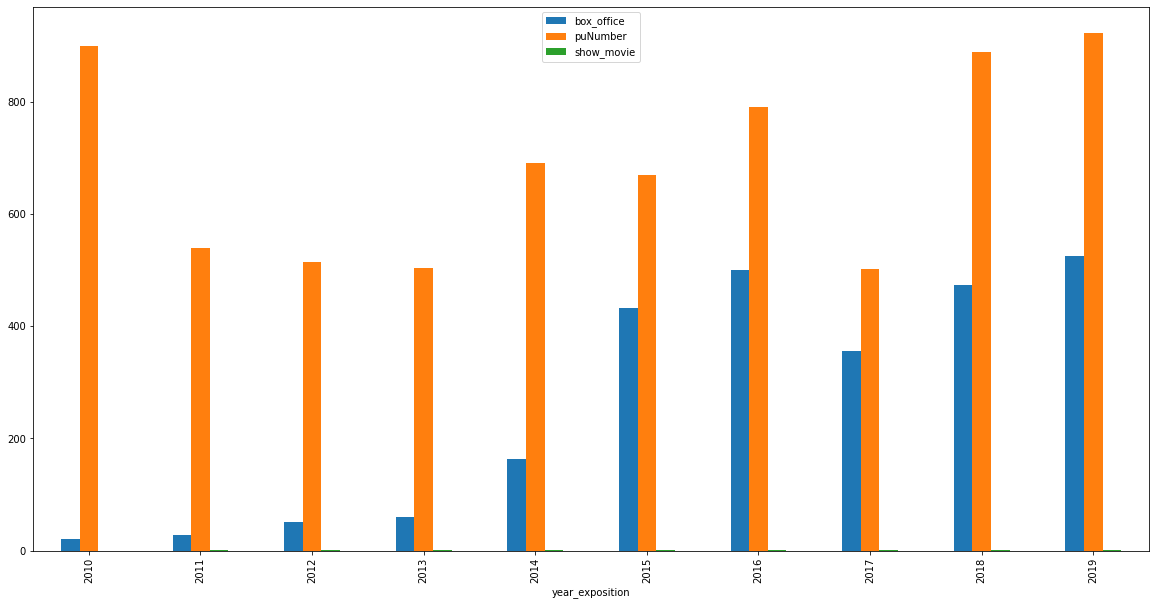

In [43]:
data_year_movies.plot(kind='bar', figsize=(20, 10));

Больше всего фильмов получили прокатное удостоверение в 2019 году, больше всего информации о сборах у нас так же за 2019 год. Меньше всего прокатных удостоверений было выдано в 2017 году. Можно обратить внимание, что с 2010 по 2013 год у нас очень мало информации о сборах. Возможно, в прокат в кинотеатрах было выпущено намного меньше фильмов, возможно этой информации просто нет

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

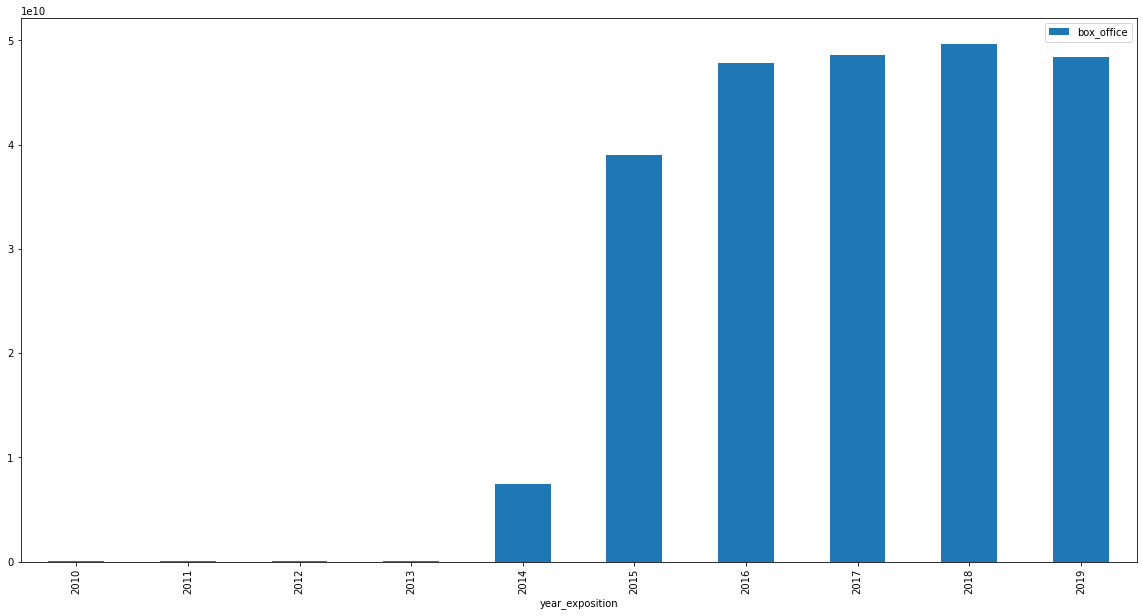

In [44]:
total_box_office = data.pivot_table(index='year_exposition', values='box_office', aggfunc=('sum'))
total_box_office.plot(kind='bar', figsize=(20, 10));

Самые большие кассовые сборы были в 2018 году, а самые маленькие в 2015. Сборы до 2015 года не учитывались, потому что информации о них очень мало.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

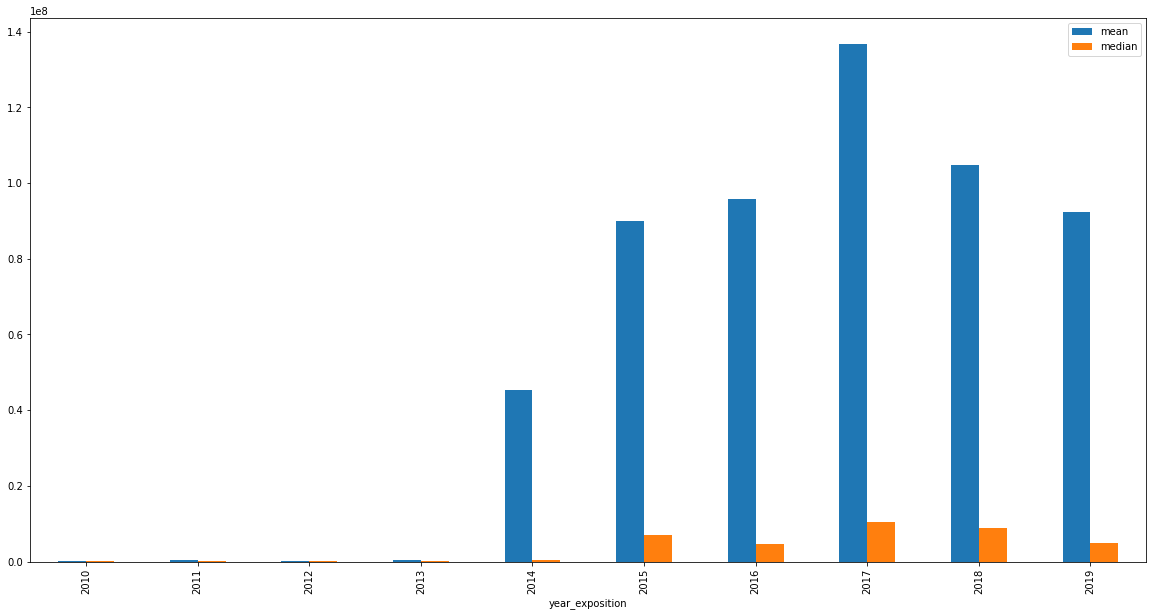

In [45]:
year_box_office = data.pivot_table(index='year_exposition', values='box_office', aggfunc=('mean', 'median'))
year_box_office.plot(kind='bar', figsize=(20, 10));

Самое большое средние значение по кассоввым сборам было в 2017 году. Это можно объяснить тем, что в этом году в прокат вышли 3 фильма киновселенной MARVEL, фильм вселенной "Звездные войны", которые всегда были достаточно кассовыми. Высокие средние сборы вполне объяснимы.

Возможно также сказалось меньшее количество фильмов, вышедших в прокат в этом году

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

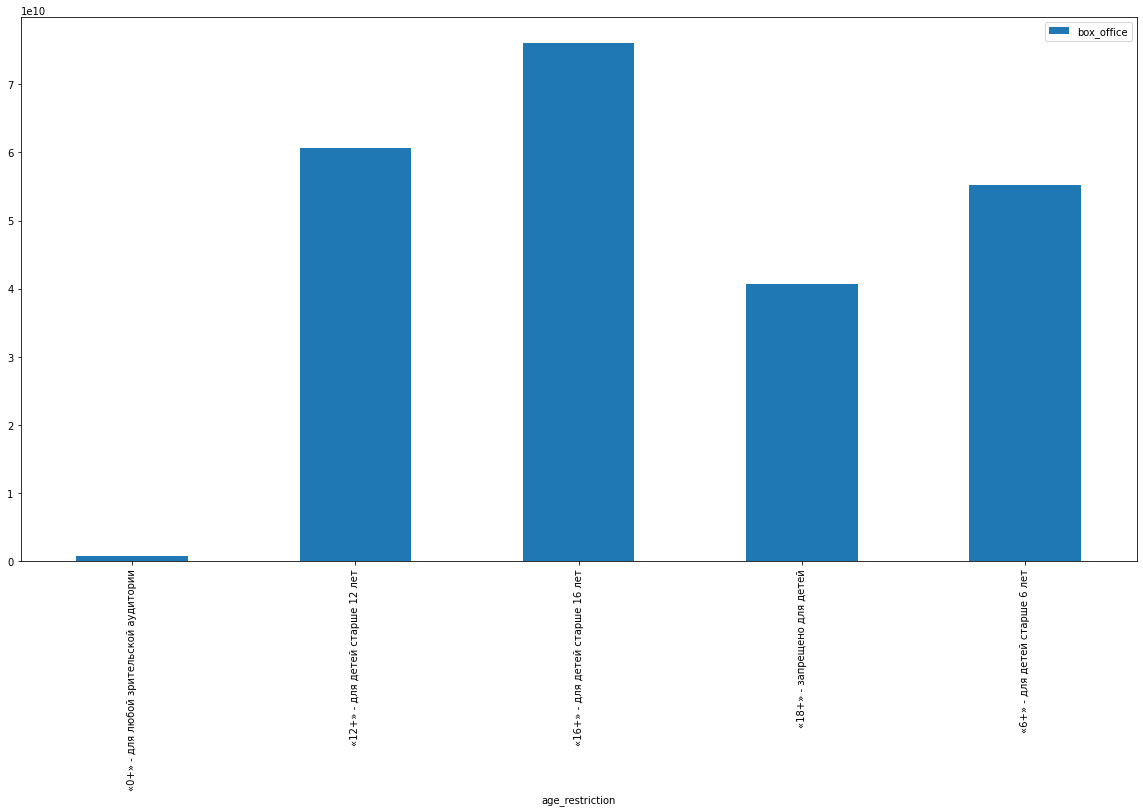

In [46]:
data_last_years = data.query('year_exposition>2014')
data_last_years.pivot_table(index='age_restriction', values='box_office',
                                            aggfunc=('sum')).plot(kind = 'bar', figsize=(20, 10));

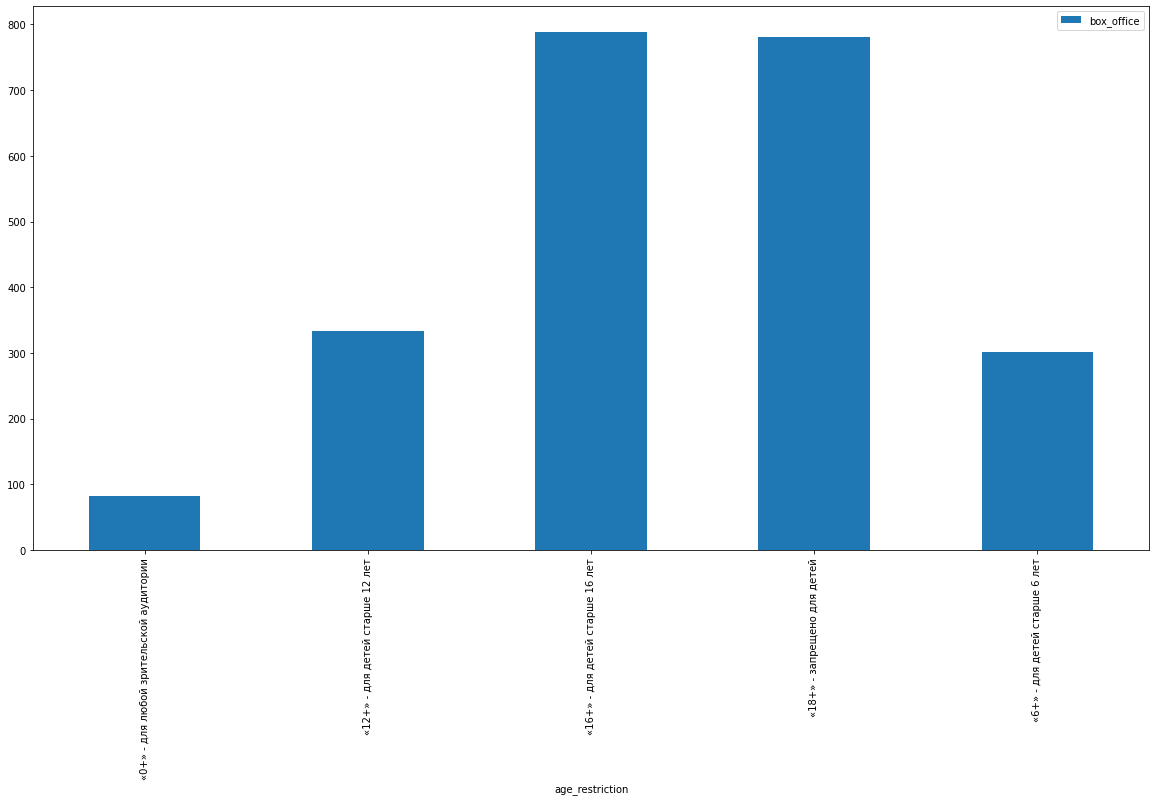

In [47]:
data_last_years.pivot_table(index='age_restriction', values='box_office',
                                            aggfunc=('count')).plot(kind = 'bar', figsize=(20, 10));

Самые большие сборы с 2015 по 2019 года были у фильмов с возрастным ограничением 16+, однако этих фильмов и вышло больше всех остальных.

In [48]:
data_last_years.pivot_table(index=('age_restriction', 'year_exposition'), values='box_office',
                                            aggfunc=('count', 'mean')).sort_values('mean').style.format('{:,.2f}')

Можно предположить, что фильмы с ограничение 18+ в целом имеют небольшие кассовые сборы, как и фильмы 0+. Больще всего собирают фильмы с ограничением 12+.

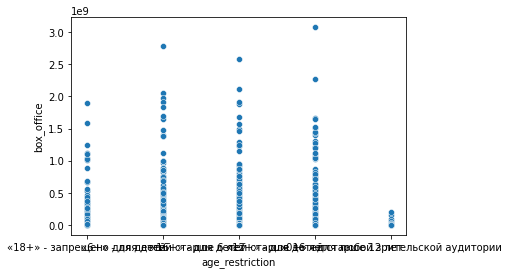

In [49]:
sns.scatterplot(data=data_last_years, x='age_restriction', y='box_office');

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [50]:
data_support = data.query('budget>0')
data_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309 entries, 1281 to 7477
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   puNumber               309 non-null    int64              
 1   box_office             295 non-null    float64            
 2   title                  309 non-null    object             
 3   show_start_date        309 non-null    datetime64[ns, UTC]
 4   type                   309 non-null    object             
 5   film_studio            309 non-null    object             
 6   production_country     309 non-null    object             
 7   director               309 non-null    object             
 8   producer               307 non-null    object             
 9   age_restriction        309 non-null    object             
 10  refundable_support     309 non-null    float64            
 11  nonrefundable_support  309 non-null    float64        

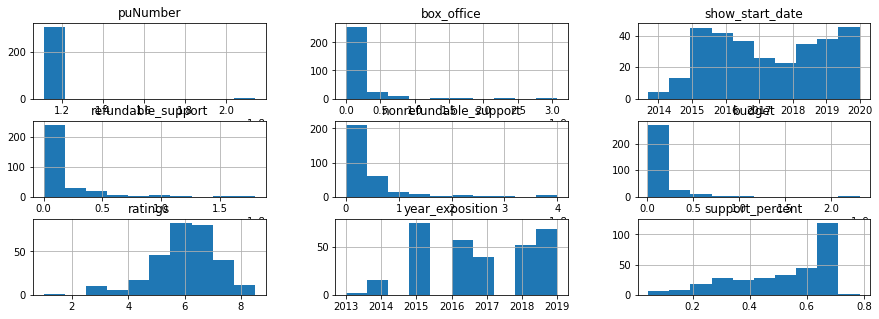

In [51]:
data_support.hist(figsize=(15, 5));

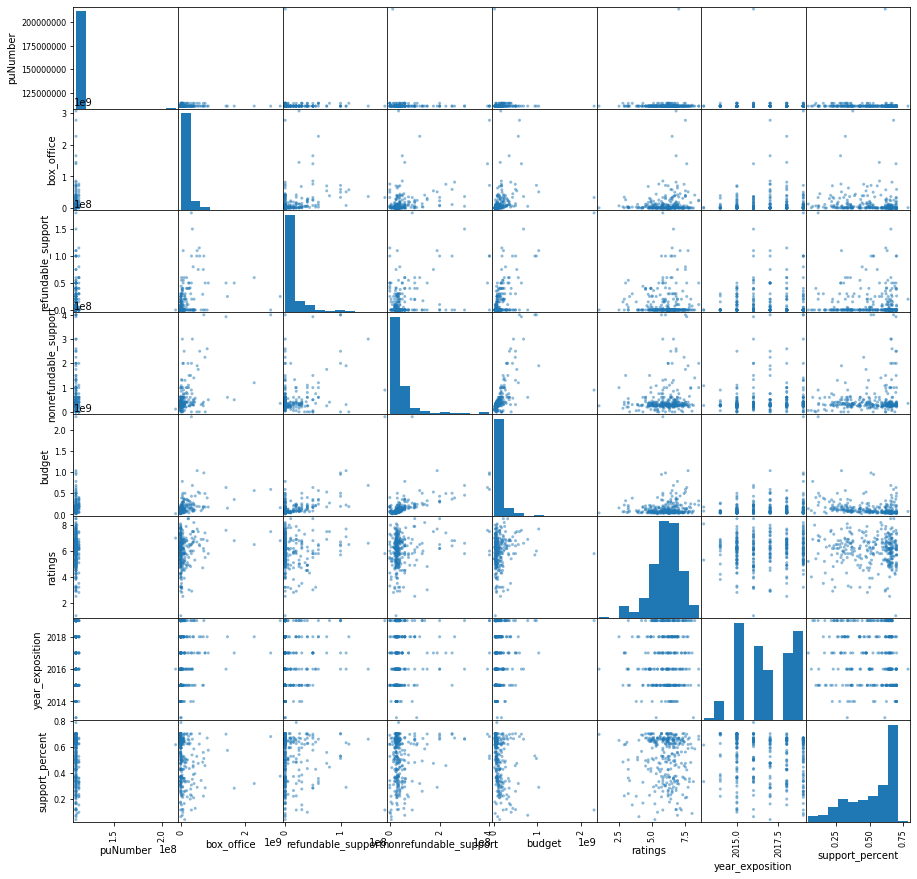

In [52]:
pd.plotting.scatter_matrix(data_support, figsize=(15,15));

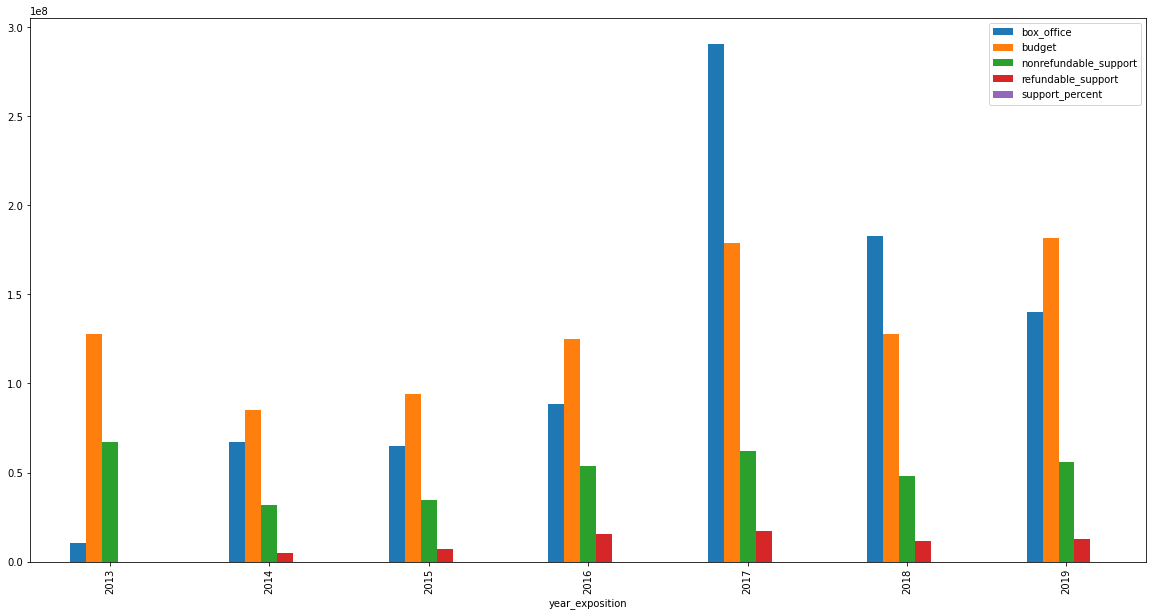

In [53]:
data_support.pivot_table(index='year_exposition', values=('box_office', 'budget', 'refundable_support',
                                                         'nonrefundable_support', 'support_percent'),
                        aggfunc=('mean')).plot(kind='bar', figsize=(20, 10));

В 2017 году были самые высокие средние сборы и один из самых высоких средних бюджетов фильма, при этом один из самых низкий прокентов государственной поддержки. Печальная ситуация в 2019 году, где средний бюджет превысил средние сборы, то же самое мы видим до 2017 года. Однако, у нас очень мало информации о сборах у фильмов, которые выходили до 2015 года, возможно такие показатели из-за недостатка информации.

In [54]:
data_support['financing_source'].unique()

array(['Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

Финансы на фильмы выделялись только за счет средств МинКульта и Фонда Кино.

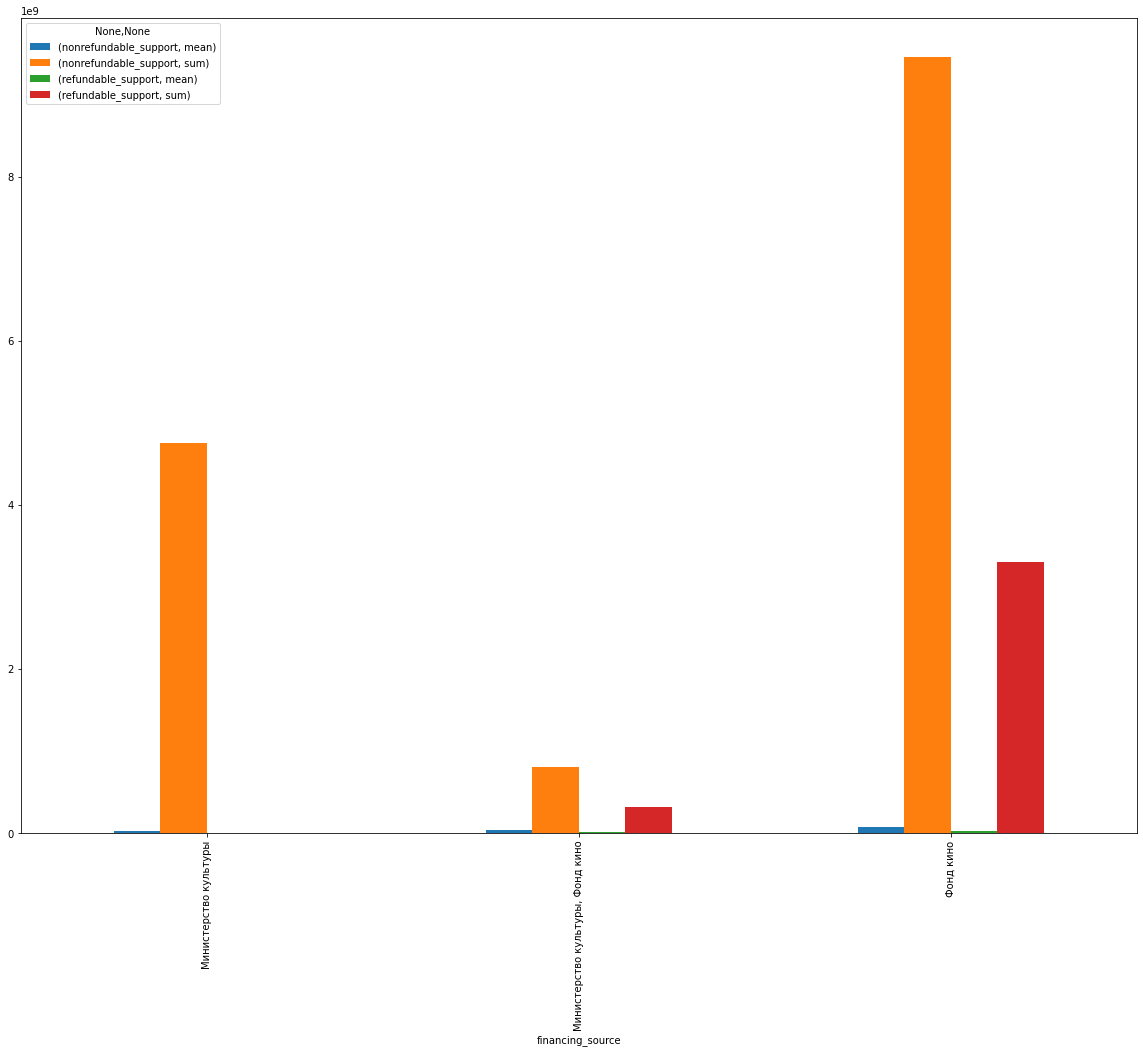

In [55]:
data_support.pivot_table(index='financing_source', values=('refundable_support', 'nonrefundable_support'),
                        aggfunc=('mean', 'sum')).plot(kind='bar', figsize=(20, 15));

Министерство Культуры выдает средства только на безвозвратной основе. Можно предположить, что в случае, когда деньги выделялись из обоих источников, объем возвратных средств принадлежит Фонду Кино. Также Фонд Кино в среднем вкладывает больше средств в российское кинопроизводство, чем МинКульт.

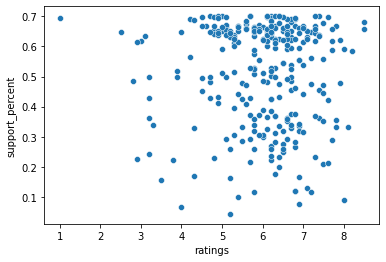

In [56]:
sns.scatterplot(data=data_support, x='ratings', y='support_percent');

Большая часть фильмов сосредоточена там, где государственная поддержка находится на уровне 60-70%

In [75]:
#разобьем рейтинг по категориям
def rating_category(rating):
    rating = rating['ratings']
    if rating<=5:
        return 'низкий'
    elif 5<rating<=8:
        return 'средний'
    elif rating>8:
        return 'высокий'
    
data_support['rating_category'] = data_support.apply(rating_category, axis=1)

In [58]:
data_support.head()

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,...,nonrefundable_support,budget,financing_source,ratings,genres,year_exposition,main_genre,main_director,support_percent,rating_category
1281,111005313,365353.6,Пока еще жива,2013-10-11 12:00:00+00:00,Художественный,"ано содействия развитию кинематографии ""ангел-...",Россия,[А.Атанесян],"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,...,26500000.0,79411900.0,Министерство культуры,8.1,"[драма, мелодрама]",2013,драма,А.Атанесян,0.333703,высокий
1448,111003314,28140.0,Бесславные придурки,2014-03-28 12:00:00+00:00,Художественный,"ооо ""компания ""атк-студио""",Россия,[А.Якимчук],А.Тютрюмов,«12+» - для детей старше 12 лет,...,26000000.0,37142857.0,Министерство культуры,NaN,[nan],2014,nan,А.Якимчук,0.700000,None
1498,111004213,19957031.5,Невидимки,2013-09-10 12:00:00+00:00,Художественный,"ооо ""компания ""реал-дакота""",Россия,"[Р.Давлетьяров, С.Комаров]","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,...,107847945.0,176023490.0,Фонд кино,5.3,"[комедия, фантастика]",2013,комедия,Р.Давлетьяров,0.612691,средний
1524,111004314,55917.5,БЕРЦЫ,2014-05-05 12:00:00+00:00,Художественный,"ооо ""студия ""пассажир""",Россия,[Е.Миндадзе (псевдоним Катя Шагалова)],Л.Антонова,«16+» - для детей старше 16 лет,...,28000000.0,40574140.0,Министерство культуры,4.2,[драма],2014,драма,Е.Миндадзе (псевдоним Катя Шагалова),0.690095,низкий
1792,111004414,232100.0,Братья Ч,2014-04-23 12:00:00+00:00,Художественный,"ооо ""студия ""пассажир""",Россия,[М.Угаров],"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,...,25000000.0,40015122.0,Министерство культуры,6.4,[драма],2014,драма,М.Угаров,0.624764,средний


In [59]:
data_support.pivot_table(index='rating_category', values=('box_office',
                        'budget', 'refundable_support', 'nonrefundable_support'),
                         aggfunc=('count', 'mean', 'sum')).style.format('{:,.2f}')

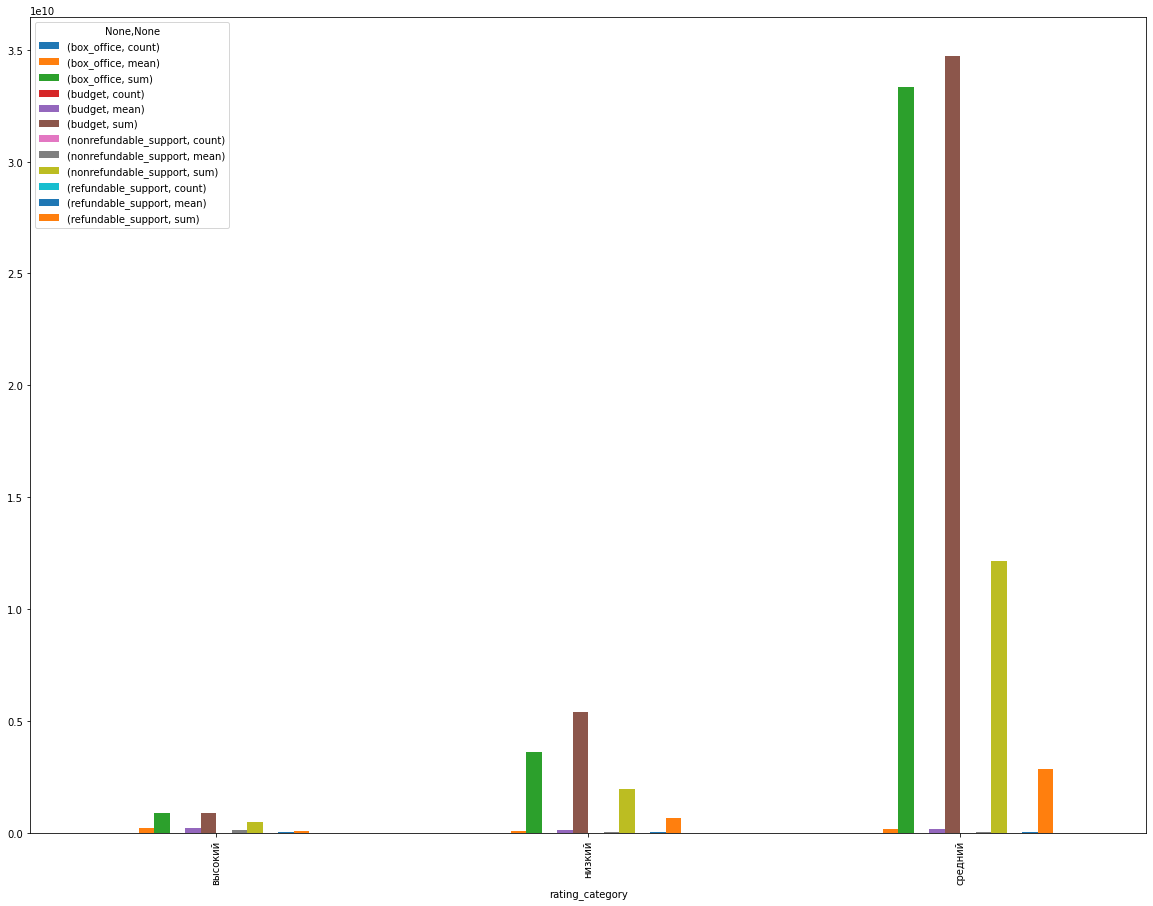

In [60]:
data_support.pivot_table(index='rating_category', values=('box_office',
                        'budget', 'refundable_support', 'nonrefundable_support'),
                         aggfunc=('count', 'mean', 'sum')).plot(kind='bar', figsize=(20, 15));

Всего высокий рейтинг получили всего 4 фильма, больше всего фильмов со средним рейтингом. Это объясняет большие суммы денег, выделенных из бюджета в качестве поддержки. Можно также заметить, что фильмы с низким рейтингом не окупились в прокате, на них в среднем было выделено меньше невозвратных средств, однако не так мало возвратных.

Судя по количеству фильмов с разной рейтинговой категорией, можно сделать вывод, что у нас снимают фильмы, которые не получают очень высокой оценки :)

In [61]:
#фильмы с высоким рейтингом
data_support[data_support['rating_category']=='высокий']

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,...,nonrefundable_support,budget,financing_source,ratings,genres,year_exposition,main_genre,main_director,support_percent,rating_category
1281,111005313,365353.6,Пока еще жива,2013-10-11 12:00:00+00:00,Художественный,"ано содействия развитию кинематографии ""ангел-...",Россия,[А.Атанесян],"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,...,26500000.0,79411900.0,Министерство культуры,8.1,"[драма, мелодрама]",2013,драма,А.Атанесян,0.333703,высокий
1869,111002915,249166767.7,А зори здесь тихие..._,2015-03-16 12:00:00+00:00,Художественный,"ооо ""компания ""реал-дакота""",Россия,[Р.Давлетьяров],NaN,«12+» - для детей старше 12 лет,...,100000000.0,220588394.0,Фонд кино,8.5,"[драма, военный, история]",2015,драма,Р.Давлетьяров,0.680000,высокий
3626,111017416,228578204.0,БОЛЬШОЙ,2016-11-22 12:00:00+00:00,Художественный,"зао ""продюсерская компания валерия тодоровского""",Россия,[В.Тодоровский],"В.Тодоровский, А.Златопольский",«12+» - для детей старше 12 лет,...,200000000.0,320000000.0,Фонд кино,8.5,"[криминал, комедия, боевик]",2016,криминал,В.Тодоровский,0.656250,высокий
6854,111006719,408646665.7,Миллиард,2019-04-17 12:00:00+00:00,Художественный,"ооо ""медиа юниверсал ивент""",Россия,[Р.Прыгунов],"В.Маслов, В.Верещагин, Б.Анисимов",«12+» - для детей старше 12 лет,...,140000000.0,240041307.0,Фонд кино,8.2,[драма],2019,драма,Р.Прыгунов,0.583233,высокий


In [62]:
#топ жанров
data_support_genre = data_support.pivot_table(index='main_genre', values=('box_office', 'support_percent'),
                         aggfunc=('count', 'sum', 'mean')).style.format('{:,.2f}')
data_support_genre

Топ-3 жанров российского кинематографа: драма, комедия, мультфильм. Средние сборы больше всего у жанра "спорт", минимальные средние сборы у детских фильмов. Минимальную поддержку получают биографии и приключения.

In [63]:
data_support[data_support['main_genre']=='спорт']

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,...,nonrefundable_support,budget,financing_source,ratings,genres,year_exposition,main_genre,main_director,support_percent,rating_category
3134,111021115,1.686889e+08,Чемпионы: Быстрее. Выше. Сильнее,2015-12-22 12:00:00+00:00,Художественный,"ооо ""энджой мувиз""",Россия,[А.Аксененко],"Г.Малков, В.Поляков",«6+» - для детей старше 6 лет,...,40000000.0,90276774.0,Фонд кино,7.0,"[спорт, драма]",2015,спорт,А.Аксененко,0.443082,средний
3784,111016416,1.939338e+07,Эластико,2016-10-18 12:00:00+00:00,Художественный,"ооо ""пятый элемент"", ооо ""реновацио интертейнм...",Россия,[М.Расходников],"Г.Малков, В.Поляков, Е.замалиев, А.Кузьминов, ...",«12+» - для детей старше 12 лет,...,15000000.0,30000000.0,Фонд кино,6.3,"[спорт, мелодрама, криминал]",2016,спорт,М.Расходников,0.500000,средний
5652,111011817,2.779686e+09,Движение вверх,2017-12-21 12:00:00+00:00,Художественный,"ооо ""студия ""тритэ"" никиты михалкова""",Россия,[А.Мегердичев],"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,...,400000000.0,590192191.0,Фонд кино,7.5,"[спорт, драма]",2017,спорт,А.Мегердичев,0.677745,средний


In [64]:
#сборы по годам у фильмов с гос.подддержкой
data_support_year = data_support.pivot_table(index='year_exposition',
                                             values=('box_office', 'budget','support_percent','ratings'),
                                            aggfunc=('count', 'mean')).style.format('{:,.2f}')
data_support_year

Самые высокие средние сборы фильмы с государственной поддержкой получили в 2017 году, хотя средний процент гос. поддержки не самый большой. Больше всего фильмов вышло в 2019 году, и в среднем они не окупились в прокате.

In [65]:
#сборы по типам
data_support_type = data_support.pivot_table(index='type',
                                            values=('box_office', 'budget', 'support_percent', 'ratings'),
                                            aggfunc=('count', 'mean','sum')).style.format('{:,.2f}')
data_support_type

В среднем больше всего поддержки оказывается художественным фильмам, их и выпускают больше всего. ОДнако средний рейтинг выше всего у документальных фильмов (1 фильма). Из-за большой разницы в количестве, сложно судить насколько это реальные цифры.

In [66]:
#сборы по возрастной аудитории
data_support_age = data_support.pivot_table(index='age_restriction',
                                           values=('budget', 'box_office', 'refundable_support', 'nonrefundable_support'),
                                           aggfunc=('count', 'sum')).style.format('{:,.2f}')
data_support_age

In [67]:
data_support['box_office'].corr(data_support['support_percent'])

-0.12232325287902085

У нас есть не такая высокая, но все же отрицательная корреляция между сборами и процентом государственной поддержки.

### Шаг 5. Напишите общий вывод

Мы проанализировали два датафрема с информацией о фильмах, имеющих прокатное удостоверение.
В процессе работы с данными была выявлена проблема в их формате. Количественные значение в столбце `ratings` была записана по разному (в разных шкалах), однако значчений в процентах было не так много, поэтому решено было от них избавиться. С категориальными значениями та же проблема, различное написание одних и тех же студий, стран-производителей и имен режиссеров. Скорее всего, такие данные заполнялись вручную, исправить эту проблему можно предложив выбор из определенного списка (и внесением новых наименований туда, если они появляются). Помимо этого, указано, что данные в столбце `budget` указываются в рублях, но для других столбцов, связанных с финансами таких данных нет, поэтому сложно понять, аномальные это значения или действительно большие (пусть и редкие) суммы.

**Выводы**

Больше всего прокатных удостовенений было выдано в 2019 году, меньше всего в 2017. Важно, что до 2015 года у нас очень мало данных о сборах фильмов в кинотеатрах.

Самые высокие сборы у фильмов были в 2018 году, однако самые высокие средние сборы были у фильмов в 2017 году. Это можно объяснить большим количеством фильмов из известных франшиз, которые стабильно собирают неплохую кассу.

Возрастные ограничения частично влияют на сборы фильма. Можно отметить, что фильмы с возрастным ограничением в 18+ стабильно собирают самую меньшую кассу, однако это не подтверждает того, что сборы зависят только от возрастного ограничения. Самые большие сборы у фильмов 12+ и 16+, но фильмов с рейтингом 16+ в целом больше выходит в прокат. Корреляции с годом нет.
Возможно, в момент введения ного закона о возрастных ограничениях (в 2012 году в России), данные бы изменились, но у нас недостаточно данных о кассовых сборах в этот период.

**Фильмы с государственной поддержкой**
Финансы выделяют всего две организации: Фонд кино и Министерство Культуры. Министерство культуры выделяет деньги только на безвозвратной основе. Фонд кино выделил большее количество финансов в бюджет российского кино. Процент поддержки в среднем варьируется от 30% до 60%. Меньше всего поддерживаются биографические фильмы.

Больше всего в России снимают драм, комедий и мультфильмов.

Самые высокие средние сборы у фильмов с государственной поддержкой были также в 2017 году, но в 2019 средний бюдждет превысил средние сборы. Возможно, у нас не так много данных о кассовых сборах.

В среднем больше всего поддержки оказывается художественным фильмам.

Больше всего выпускается фильмов с возрастным ограничением в 16+, сложно судить, насколько они окупаются, потому что количество данных о сборах фильмов меньше, чем количество данных о бюджете.

Большая часть фильмов имеют средний рейтинг (ниже 8), всего 4 фильма имеют высокий рейтинг, и 